# Python for Researchers
[www.pythonforresearchers.com](http://pythonforresearchers.com)

[@py4res](https://twitter.com/py4res)

## 0. Overview: Data handling and visualisation mini series

1. Getting data direct from the web
2. Plotting data (using Matplotlib)
3. Making your plot look awesome
4. Making your plot interactive (Plotly)
5. Cool Jupyter Notebook functionality

In [18]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XDcOSxwlqiY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## You are going to make this!

<img src="world_population.png">

## Part 1: Getting data direct from the web

In [19]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LQrs_00NBwE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [20]:
# import pandas
import pandas as pd
URL = "https://en.wikipedia.org/wiki/World_population"

In [21]:
# Read data into pandas datafrom direct from the web
df = pd.read_html(URL, header=0, index_col=0)[8]

In [22]:
# Filter the columns - historical data only
df_filtered = df[df.columns[0:12]]
df_filtered

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
Region,,,,,,,,,,,,
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603
North America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [23]:
# Tidy up index
index = df_filtered.index.values
df_filtered.index = [x.replace("[Note 1]", "") for x in index]

In [24]:
# Sort table according to 2012 population
df_filtered.sort_values(by=["2012"], ascending=False)

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America,40,20,10,16,24,38,74,167,508,577,590,603
North America,6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [25]:
# Save table to excel spreadsheet
df_filtered.to_excel("world_population.xlsx")

## Part 2: Generating a basic plot (using Matplotlib)

In [26]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/F7k_4S38qgY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [27]:
# import matplotlib
import matplotlib.pyplot as plt

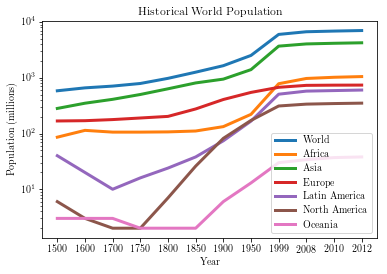

In [28]:
# Setup figure and axis
fig, ax = plt.subplots()

# Plot each row as a line
for row in df_filtered.iterrows():
    ax.plot(row[1], label=row[0], linewidth=3)
    
# Set title and axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('Historical World Population')

# Include a legend
ax.legend()

# Use a logarithmic y scale
ax.set_yscale("log")

plt.show()


In [29]:
# Export figure
fig.savefig("world_pop_basic.png", transparent=False)

## Part 3: Jazzing up the plot

In [30]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iVMjUCyYr4c" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

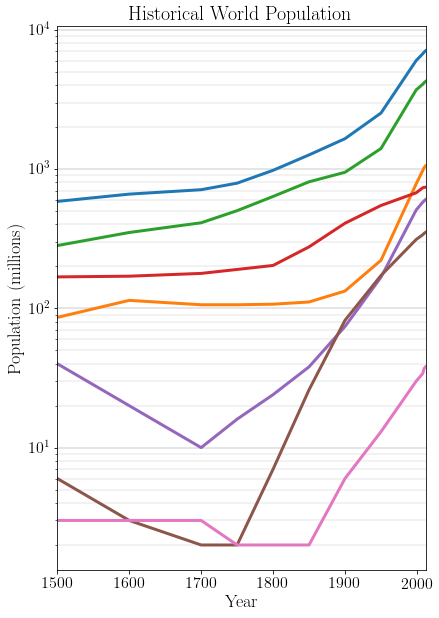

In [45]:
# Set dataframe column labels to integers instead of strings
# This lets matplotlib automagically adjust the spacing of the
# x-axis tick labesl
years = df_filtered.columns.values
df_filtered.columns = list(map(int, years))

# Set Latex font for plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Define height and width
height = 10
width = 0.66*height

# Setup figure and axis
fig, ax = plt.subplots(figsize=(width, height))

# Plot each row as a line
for row in df_filtered.iterrows():
    ax.plot(row[1], label=row[0], linewidth=3)
    
# Set title and axis labels
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Population (millions)', fontsize=18)
ax.set_title('Historical World Population', fontsize=20)
ax.tick_params(labelsize=16)

# Set x-axis range
ax.set_xlim(1500, 2012)

# Set gridlines
ax.grid(which='minor', linewidth=0.2, color='grey')
ax.grid(which='major', linewidth=0.4, color='grey', axis='y')

# Include a legend
#ax.legend(fontsize=14)

# Use a logarithmic y scale
ax.set_yscale("log")

plt.show()

# Export your figure
fig.savefig("world_population.eps", format="eps") # vector
fig.savefig("world_population_jazzy.png", transparent=False) # png with white background

## Part 4: Creating interactive graphs with Plotly

In [48]:
# import plotly 
import plotly.plotly as py
import plotly.tools as tls

# set credentials
#tls.set_credentials_file(username='', api_key='')

In [52]:
# convert matplotlib fig to plotly fig
plotly_fig = tls.mpl_to_plotly(fig)

In [53]:
# generate plot
py.iplot(plotly_fig, filename='world_pop')